# HSE 2023: Mathematical Methods for Data Analysis

## Homework 1

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make conclusions) then **text answer** is **mandatory** and **is** part of the task
* **Do not** upload the dataset (titanic.csv) to the grading system (we already have it)
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task.
Loops are only allowed in part 1 (Tasks 1 - 4).
* Some tasks contain tests. They only test your solution on a simple example, thus, passing the test does **not** guarantee you the full grade for the task.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Python (2 points)

**Task 1** (0.5 points)<br/>
Enter nonzero numbers `a`, `d` and `N`. Find the sum of the first `N` members of [harmonic sequence](https://en.wikipedia.org/wiki/Harmonic_progression_(mathematics)) with the first member denominator `a`

In [2]:
def find_sum(a: int, d: int, N: int) -> float:
    return sum([1 / (a + i * d) for i in range(0, N)])

a = 1
d = 1
N = 10
print(find_sum(a, d, N))

2.9289682539682538


**Task 2** (0.5 points) <br/>
Enter an integer number `N`. Check if it is a palindrome number **without converting it to the string**. It means that it can be read equally from left to right and from right to back.

In [4]:
def check_palindrome(N):
    l = []

    while N:
        l.append(N % 10)
        N //= 10

    for i in range(len(l) // 2):
        if l[i] != l[len(l) - i - 1]:
            return False

    return True

for N in [3, 81, 111, 113, 810, 2022, 4774, 51315, 611816]:
    print(N, check_palindrome(N))

3 True
81 False
111 True
113 False
810 False
2022 False
4774 True
51315 True
611816 False


**Task 3** (0.5 points) <br/>
Find the first `N` palindrome numbers starting from 42 (you may use the function from the precious task).

In [5]:
from itertools import count

def find_palindromes(N):
    l = []

    for i in count(42):
        if len(l) == N:
            break

        if check_palindrome(i):
            l.append(i)

    return l

print(find_palindromes(3))
print(find_palindromes(13))
print(find_palindromes(23))

[44, 55, 66]
[44, 55, 66, 77, 88, 99, 101, 111, 121, 131, 141, 151, 161]
[44, 55, 66, 77, 88, 99, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 202, 212, 222, 232, 242, 252, 262]


**Task 4** (0.5 points) <br/>
There are numbers: `a`, `b`, `c`. Without using functions `min`, `max` and other functions, find the median number.

In [6]:
from random import randint

def find_median(a, b, c):
    if a <= b <= c:
        return b

    if c <= b <= a:
        return b

    if a <= c <= b:
        return c

    if b <= c <= a:
        return c

    if b <= a <= c:
        return a

    if c <= a <= b:
        return a

for i in range(10):

    a = randint(-100, 100)
    b = randint(-100, 100)
    c = randint(-100, 100)

    print(a, b, c, '\tMedian:', find_median(a, b, c))

85 -80 1 	Median: 1
-66 48 67 	Median: 48
-13 -86 -67 	Median: -67
-37 -63 26 	Median: -37
-36 -13 21 	Median: -13
-1 -2 -88 	Median: -2
41 63 1 	Median: 41
15 -98 -40 	Median: -40
-12 89 -42 	Median: -12
12 -87 -60 	Median: -60


# 2. Numpy (4 points)

**Task 1** (0.5 points) <br/>
Create a random array from Gaussian distribution with length of 12 and with sum of its elements equal to 15. Distribution shall be left Gaussian

In [28]:
my_array = np.random.normal(size=12)

my_array *= 15 / np.sum(my_array)

print(f'Length: {len(my_array)}')
print(f'Sum of elements: {np.sum(my_array)}')

Length: 12
Sum of elements: 15.000000000000256


**Task 2** (0.5 points) <br/>
Create two random arrays $a$ and $b$ with the same length.

Calculate the following distances between the arrays **without using any special function. You may only use basic numpy operations (`np.linalg.*` and other high-level ones are prohibited).**:

* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Chebyshev Distance
$$ d(a, b) = \underset{i}{max} |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2} $$


In [78]:
def calculate_manhattan(a, b):
    return np.sum(np.abs(a-b))

def calculate_euclidean(a, b):
    return np.sqrt(np.sum(np.power(a-b, 2)))

def calculate_chebyshev(a, b):
    return np.max(np.abs(a-b))

def calculate_cosine(a, b):
    def not_np_norm(v):
        return np.sqrt(np.sum(np.power(v, 2)))

    return 1 - (np.dot(a, b) / (not_np_norm(a) * not_np_norm(b)))

In [98]:
a = np.random.normal(size=69)
b = np.random.normal(size=69)
print(f'Manhattan distance: {calculate_manhattan(a, b)}')
print(f'Euclidean distance: {calculate_euclidean(a, b)}')
print(f'Chebyshev distance: {calculate_chebyshev(a, b)}')
print(f'Cosine distance: {calculate_cosine(a, b)}')

Manhattan distance: 64.84018645023518
Euclidean distance: 9.824477444830055
Chebyshev distance: 3.4552382073825303
Cosine distance: 0.8900029128776441


**Task 3** (0.5 points) <br/>
Create a random array of integers with length of 42. Transform the array so that
* Maximum element(s) value is 10
* Minimum element(s) value is -6
* Other values are in interval (-6; 10) without changing the relative order (relation $\frac{x_i}{x_{i-1}}=\frac{\widehat{x}_{i}}{\widehat{x}_{i-1}}$ holds)

In [99]:
def transform(a):
    return np.interp(a, (a.min(), a.max()), (-6, 10))
    

In [100]:
my_array = np.random.normal(size=42)
my_array = transform(my_array)
print(f'Min: {np.min(my_array)}')
print(f'Max: {np.max(my_array)}')
print('Array:')
print(my_array)

Min: -6.0
Max: 10.0
Array:
[ 9.47931486e-01  9.73157142e-01  2.41152832e+00 -6.00000000e+00
  5.31225294e+00  4.01776188e-03  4.66969639e+00 -3.22653432e+00
  2.69560194e+00  2.95259384e+00  2.39794516e+00 -5.59034361e-01
  3.69943761e+00 -9.78671692e-01  2.71422219e+00 -7.49492863e-02
  5.59299126e+00  8.80783490e+00  2.82813258e-02  3.06376643e+00
  6.56903599e+00  7.50775213e-01 -2.57615368e+00  1.00000000e+01
  7.46554071e-01  4.44155363e-01  3.78032094e+00  4.88672834e+00
  2.02753428e+00  3.91141934e+00  5.22792333e+00  4.87576273e+00
  4.71888289e+00  3.01485677e+00  3.64733487e+00  3.46046187e+00
 -1.96687697e+00  7.66725928e-01  3.03809381e+00  1.66689605e+00
  5.55460672e+00 -4.31149579e-01]


**Task 4** (0.5 points) <br/>
Create an array with shape of $10 \times 3$ with integers from [-12, 4]. Find a column that contains the minimum element of the array.

In [ ]:
my_array = ## Your code here
selected_column = ## Your code here
print('Shape: ', my_array.shape)
print('Array:')
print(my_array)
print(f'Selected column: {selected_column}')

**Task 5** (0.5 points) <br/>

Replace all missing values in the following array with the most appropriate quantile, explain why you chose it.

In [101]:
arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan

print('Array:')
print(arr)

Array:
[       nan        nan 0.64736642 0.17606663        nan 0.55668049
 0.0410608  0.43921609 0.58057824 0.16297956]


In [104]:
def replace_missing(arr):
    q = np.nanquantile(arr, 0.5)
    return np.nan_to_num(arr, nan=q)

In [105]:
arr = replace_missing(arr)
print('Array with no missing values:')
print(arr)

Array with no missing values:
[0.43921609 0.43921609 0.64736642 0.17606663 0.43921609 0.55668049
 0.0410608  0.43921609 0.58057824 0.16297956]


**Answer:** вытащить данные из ниоткуда в любом случае нельзя, взять квантиль 1/2 чтобы получить данные близкие к уже существующим - единственный вменяемый вариант, кмк

**Task 6** (0.5 points) <br/>
Create a function which takes an image ```X``` (3D array of the shape (n, m, 3)) as an input and returns the median and std for every channel (you should get a vector of shape 3, RGB).

In [110]:
def stats_channel(X):
    return np.array([np.median(X[:, :, 0]), np.median(X[:, :, 1]), np.median(X[:, :, 2])]), np.array([np.std(X[:, :, 0]), np.std(X[:, :, 1]), np.std(X[:, :, 2])])
    

In [111]:
n = 19
m = 23
X = np.random.randint(-11, 8, size=(n, m, 3))
print(stats_channel(X))

(array([-2., -3., -2.]), array([5.67601398, 5.62374939, 5.45398463]))


### **Task 7** (1 points) <br/>
Create a function which takes a 3D matrix ```X``` as an input and returns all its unique values along the first axis.

Sample input:

```
np.array(
  [[[1, 2, 3],
    [1, 2, 3],
    [1, 2, 3]],

   [[4, 5, 6],
    [4, 5, 7],
    [4, 5, 6]],

   [[7, 8, 9],
    [7, 8, 9],
    [7, 8, 9]]]
)
```
  
Sample output:

```
np.array(
  [[[1, 2, 3],
    [1, 2, 3]],

   [[4, 5, 6],
    [4, 5, 7]],

   [[7, 8, 9],
    [7, 8, 9]]]
)
```

In [172]:
def get_unique_values(X):
    return np.unique(X, axis=1)

In [173]:
X =  np.random.randint(4, 6, size=(3, 3, 3))
print('Matrix:')
print(X)
print('Unique :')
get_unique_values(X)

Matrix:
[[[4 5 5]
  [5 4 5]
  [4 5 4]]

 [[5 5 5]
  [5 5 5]
  [5 5 4]]

 [[4 4 5]
  [5 5 5]
  [5 5 4]]]
Unique :


array([[[4, 5, 4],
        [4, 5, 5],
        [5, 4, 5]],

       [[5, 5, 4],
        [5, 5, 5],
        [5, 5, 5]],

       [[5, 5, 4],
        [4, 4, 5],
        [5, 5, 5]]])

# 3. Pandas & Visualization (4 points)


You are going to work with *Titanic* dataset which contains information about passengers of Titanic:
- **Survived** - 1 - survived, 0 - died (0); **Target variable**
- **pclass** - passengers's class;
- **sex** - passengers's sex
- **Age** - passengers's age in years
- **sibsp**    - is the passenger someones siblings   
- **parch**    - is the passenger someones child or parent
- **ticket** - ticket number    
- **fare** - ticket price    
- **cabin** - cabin number
- **embarked** - port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

**Note** for all visualizations use matplotlib or seaborn but NOT plotly! Plotly's graphics sometimes vanish after saving. In this case the task won't be graded.

**Note** support all your answers with necessary code, computations, vizualization, and explanation. Answers without code and explanation won't be graded.

**Task 0** (0 points) \
Load the dataset and print first 6 rows

In [181]:
dataset =  pd.read_csv("titanic.csv")
dataset.head(n=6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


**Task 1** (1 points) <br/>
Answer the following questions:
    
    * Are there any missing values? In what columns?
    * What is the percentage of survived passengers? Are the classes balanced?
    * Were there more males or females?
    * What what the least popular port of embarkation?
    * How many passenger classes (pclass) were there on Tinanic?
    * What is the overall average ticket fare? And for every passenger class?
Please, write not only the answers but the code, proving it.

In [183]:
dataset.isnull().sum() # Missing values regarding Age, Cabin and Embarking point

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [194]:
len(dataset.loc[dataset["Survived"] == 1]) / len(dataset) * 100 # 1/3 survived => not balanced

38.38383838383838

In [196]:
print(f"Males: {len(dataset.loc[dataset['Sex'] == 'male'])}")
print(f"Females: {len(dataset.loc[dataset['Sex'] == 'female'])}")

Males: 577
Females: 314


In [198]:
dataset["Embarked"].value_counts() # => Q

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [202]:
len(dataset["Pclass"].unique())

3

In [207]:
print(f"General mean: {dataset['Fare'].mean()}")

for pclass in np.sort(dataset["Pclass"].unique()):
    print(f"{pclass} mean: {dataset.loc[dataset['Pclass'] == pclass]['Fare'].mean()}")

General mean: 32.204207968574636
1 mean: 84.1546875
2 mean: 20.662183152173913
3 mean: 13.675550101832993


**Task 2** (0.5 points) <br/>
Visualize age distribution (you may use a histogram, for example).

    * What is the minimal and maximum ages of the passengers? Visualize it on the plot
    * What is the median age? And among males and females separately? Visualize it on the separate plot
    * Make conclusions about what you see on the plots

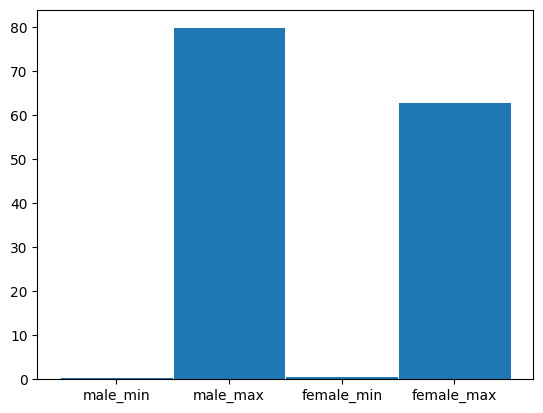

In [210]:
x = ["male_min", "male_max", "female_min", "female_max"]
y = [dataset.loc[dataset["Sex"] == "male"]["Age"].min(), dataset.loc[dataset["Sex"] == "male"]["Age"].max(), dataset.loc[dataset["Sex"] == "female"]["Age"].min(), dataset.loc[dataset["Sex"] == "female"]["Age"].max()]

fig, ax = plt.subplots()

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

plt.show()

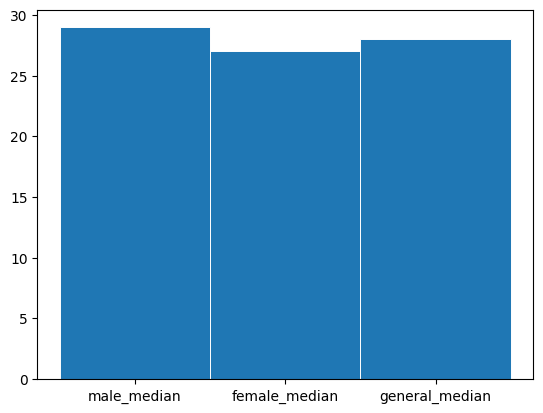

In [211]:
x = ["male_median", "female_median", "general_median"]
y = [dataset.loc[dataset["Sex"] == "male"]["Age"].median(), dataset.loc[dataset["Sex"] == "female"]["Age"].median(), dataset["Age"].median()]

fig, ax = plt.subplots()

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

plt.show()

**Task 3** (1 points) <br/>
Find all the titles of the passengers (example, *Capt., Mr.,Mme.*), which are written in the column Name, and answer the following questions:

    * How many are there unique titles?
    * How many are there passengers with every title?
    * What is the most popular man's title? And woman's title?
    
**Hint** You may select the title from the name as a word which contains a dot and is not middle name.

In [216]:
def extract_title(name):
    name = name.split()

    for piece in name:
        if piece.endswith("."):
            return piece

    return np.nan

dataset["Title"] = dataset["Name"].apply(extract_title)

['Mr.' 'Mrs.' 'Miss.' 'Master.' 'Don.' 'Rev.' 'Dr.' 'Mme.' 'Ms.' 'Major.'
 'Lady.' 'Sir.' 'Mlle.' 'Col.' 'Capt.' 'Countess.' 'Jonkheer.']
17
891


In [217]:
print(dataset["Title"].unique())
print(len(dataset["Title"].unique()))
print(dataset["Title"].value_counts())

['Mr.' 'Mrs.' 'Miss.' 'Master.' 'Don.' 'Rev.' 'Dr.' 'Mme.' 'Ms.' 'Major.'
 'Lady.' 'Sir.' 'Mlle.' 'Col.' 'Capt.' 'Countess.' 'Jonkheer.']
17
Title
Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
Countess.      1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: count, dtype: int64


In [220]:
print(f"Woman's most popular title: {dataset.loc[dataset['Sex'] == 'female']['Title'].value_counts().idxmax()}")
print(f"Man's most popular title: {dataset.loc[dataset['Sex'] == 'male']['Title'].value_counts().idxmax()}")

Woman's most popular title: Miss.
Man's most popular title: Mr.


**Task 4** (0.5 points) <br/>
Is there correlation between *pclass* and *ticket price*? Calculate mean price for each class and visualize price distribution for each class as well. Make conclusions about what you see on the plot

Hint: you could make one or several plot types i.e.  box, violine, pair, histogram (see additional notebooks for Seminar 1 "Visualization with Seaborn"). Main point here is to **choose** plots wisely and **make meaningful conclusions**



<BarContainer object of 3 artists>

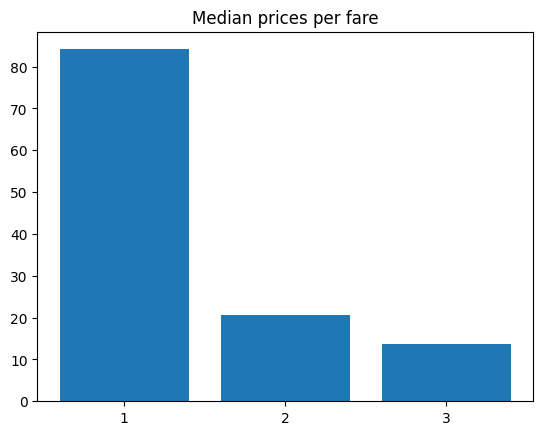

In [223]:
fig, ax = plt.subplots()
pclasses = np.sort(dataset["Pclass"].unique())

ax.set_title("Median prices per fare")
ax.set_xticks(pclasses)
ax.bar(pclasses, [dataset.loc[dataset['Pclass'] == pclass]['Fare'].mean() for pclass in pclasses])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3755df4640>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3755df5ae0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3755df5690>,
 'medians': [<matplotlib.lines.Line2D at 0x7f3755df5fc0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3755df6260>,
 'means': []}

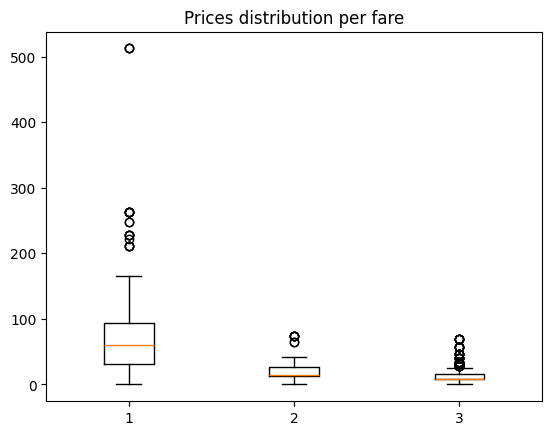

In [227]:
fig, ax = plt.subplots()
pclasses = np.sort(dataset["Pclass"].unique())

ax.set_title("Prices distribution per fare")
ax.set_xticks(pclasses)
ax.boxplot([dataset.loc[dataset['Pclass'] == pclass]['Fare'] for pclass in pclasses])

Очевидно, билеты первого класса дороже второго, и так далее. При этом для всех классов есть аномалии (но только вверх) - возможно, какие-то билеты повышенной комфортности.

**Task 5** (0.5 points) <br/>
The same question as in task 4 about correlation between *embarked* and *ticket priсe*.

<BarContainer object of 3 artists>

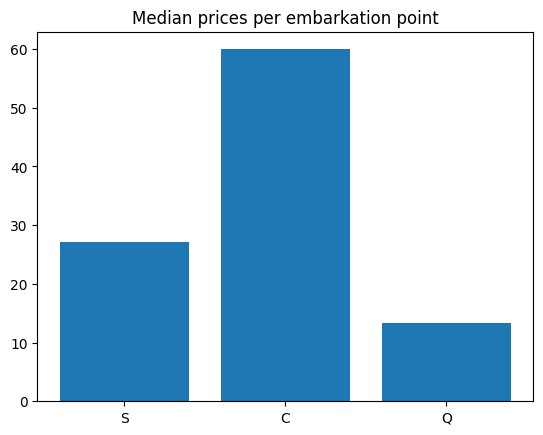

In [243]:
fig, ax = plt.subplots()
embarkations = dataset["Embarked"].dropna().unique()

ax.set_title("Median prices per embarkation point")
ax.bar(embarkations, [dataset.loc[dataset['Embarked'] == embark]['Fare'].mean() for embark in embarkations])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3754504c10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f37544b2fb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3754504b80>,
 'medians': [<matplotlib.lines.Line2D at 0x7f37544b1180>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f37544b3010>,
 'means': []}

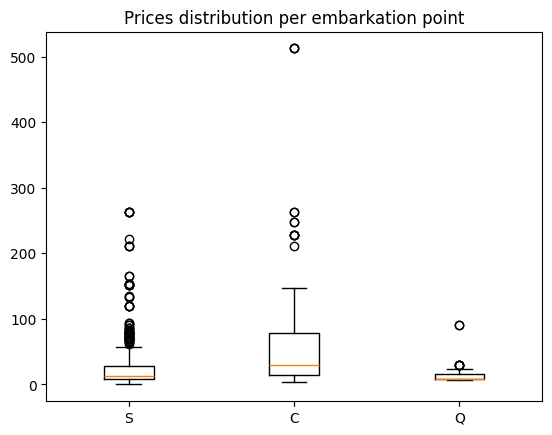

In [256]:
fig, ax = plt.subplots()
embarkations = dataset["Embarked"].dropna().unique()

ax.set_title("Prices distribution per embarkation point")
ax.set_xticks([1, 2, 3], embarkations)
ax.boxplot([dataset.loc[dataset['Embarked'] == embark]['Fare'] for embark in embarkations], labels=embarkations)

Q - самый дешевый (последняя остановка?), S и C - дороже. Аналогичная картина с расбросом цен - возможно, это просто "поздние" билеты, или еще что-то такое.

**Task 6** (0.5 points) <br/>
Visualize age distribution for survived and not survived passengers separately and calculate the mean age for each class. Are they different? Provide the same visualization for males and females separately. Make conclusions about what you see on the plots

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3755f570a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3754549e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f375438ee30>,
 'medians': [<matplotlib.lines.Line2D at 0x7f37545480a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3754548310>,
 'means': []}

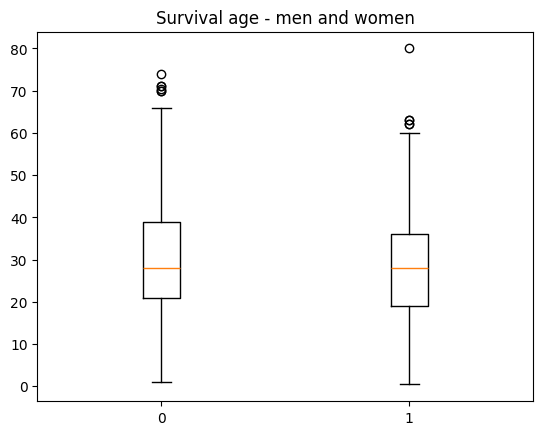

In [255]:
fig, ax = plt.subplots()
survival = dataset["Survived"].dropna().unique()

ax.set_title("Survival age - men and women")
ax.boxplot([dataset.loc[dataset['Survived'] == s]['Age'].dropna() for s in survival], labels=survival)

Видим, что средний возраст выжившего без привязки к полу выше чем возраст погибшего

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3752439f60>,
 'caps': [<matplotlib.lines.Line2D at 0x7f375243a4a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3752439cc0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f375243a9e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f375243ac80>,
 'means': []}

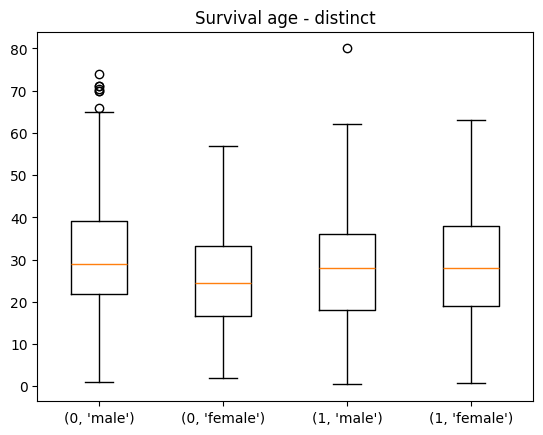

In [263]:
from itertools import product

fig, ax = plt.subplots()
survival = dataset["Survived"].dropna().unique()
sex = dataset["Sex"].dropna().unique()

filters = list(filters)

ax.set_title("Survival age - distinct")
ax.boxplot([dataset.loc[(dataset['Survived'] == su) & (dataset['Sex'] == sx)]['Age'].dropna() for su, sx in filters], labels=filters)

In [ ]:
Вывод: несмотря на пониженный возраст погибших девушек, в целом каких-то отклонений по возрасту как выживших, так и погибших нет.